In [ ]:
# no need to import smtplib for this code
# no need to import time for this code
import imaplib
import email
import os
import webbrowser
import glob
import pandas as pd
from pyquery import PyQuery as pq   
from bs4 import BeautifulSoup
import re
import getpass

mail = imaplib.IMAP4_SSL('imap.gmail.com')
username = input('Enter your username :')
password = print('Enter your password below :')
password = getpass.getpass()
mail.login(username, password)
print ('\n')
#print ('====================================================================================================')
mail.select('inbox')


In [ ]:
result, data = mail.search(None, 'ALL')
mail_ids = data[0]
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
list10 = []
list11 = []
list12 = []
list13 = []
list14 = []

In [ ]:
id_list = mail_ids.split()   
first_email_id = int(id_list[0])
latest_email_id = int(id_list[-1])

In [ ]:
for i in range(latest_email_id,first_email_id, -1):
    # need str(i)
    result, data = mail.fetch(str(i), '(RFC822)' )

    for response_part in data:
        if isinstance(response_part, tuple):
            # from_bytes, not from_string
            msg = email.message_from_bytes(response_part[1])

            #different parts of the email
            email_subject = msg['subject']


            x = msg['from']
            y = x.find('<')
            email_from = x[y+1:-1]
            email_received = msg['received'] 
            email_date = msg['date']

            value = msg['DKIM-Signature']
            email_DKIM = 'Na' if value is None else value

            value2 = msg['received-SPF']

In [ ]:
 #picking up the client ip from the SPF
            #answer = value2.find('client-ip')

            email_SPF = 'Na' if value2 is None else value2[:4]

            if email_SPF == 'Na':
                value3 = 'Na'
            else:
                answer = value2.find('client-ip')
                value3 = value2[answer+10:-1]

            email_IP = 'Na' if value3 is None else value3
            
            email_ID = msg['Message-ID']
            email_return_path = msg['Return-Path']
            email_reply_to = msg['Reply-to']
            email_auth_res = msg['Authentication-Results']
            email_mailed_by = msg['mailed-by']

In [ ]:
# CHECKING SPAM STATUS USING https://matrix.spfbl.net/
            
            url = "https://matrix.spfbl.net/{name}"
            string = 'flagged'
            string2 = 'bulk'
            string3 = 'clean'
            response = pq(url=url.format(name=str(email_IP)))
            response = str(response)
            soup = BeautifulSoup(response, 'html.parser')
            if  bool(soup.body.find_all(string=re.compile('.*{0}.*'.format(string)), recursive=True)) == True:
                spam_status = soup.body.find_all(string=re.compile('.*{0}.*'.format(string)), recursive=True)
                print (spam_status)
                list13.append(spam_status)
            elif bool(soup.body.find_all(string=re.compile('.*{0}.*'.format(string2)), recursive=True)) == True: 
                spam_status = soup.body.find_all(string=re.compile('.*{0}.*'.format(string2)), recursive=True)
                print(spam_status)
                list13.append(spam_status)
            elif bool(soup.body.find_all(string=re.compile('.*{0}.*'.format(string3)), recursive=True)) == True:
                spam_status = soup.body.find_all(string=re.compile('.*{0}.*'.format(string3)), recursive=True)
                print (spam_status)
                list13.append(spam_status)
            else:
                #spam_status = str'No given status. Check the website ' + url + ' for more information.'
                print (spam_status)
                #list13+=spam_status


In [ ]:
 #CHECKING SPAM STATUS USING zen.spamhaus.org
            
            import dns.resolver
            bl = "zen.spamhaus.org"
            myIP = email_IP

            try:
                my_resolver = dns.resolver.Resolver() #create a new resolver
                query = '.'.join(reversed(str(myIP).split("."))) + "." + bl #convert 144.76.252.9 to 9.252.76.144.zen.spamhaus.org
                answers = my_resolver.query(query, "A") #perform a record lookup. A failure will trigger the NXDOMAIN exception
                answer_txt = my_resolver.query(query, "TXT") #No exception was triggered, IP is listed in bl. Now get TXT record
                status = 'IP: %s IS listed in %s (%s: %s)' %(myIP, bl, answers[0], answer_txt[0])
                print ('IP: %s IS listed in %s (%s: %s)' %(myIP, bl, answers[0], answer_txt[0]))
                list14.append(status)
            except dns.resolver.NXDOMAIN:
                status = 'IP: %s is NOT listed in %s' %(myIP, bl)
                print ('IP: %s is NOT listed in %s' %(myIP, bl))
                list14.append(status)


In [ ]:
 #printing and storing them in a list                 
            #print ('From : ' + email_from )
            list1.append(email_from)
            #print ('Subject : ' + email_subject)
            list2.append(email_subject)
            #print ('Date :' + email_date)
            list3.append(email_date)
            #print ('Received : ' + email_received)
            list4.append(email_received)
            #print ('DKIM-Signature : ' + email_DKIM)
            list5.append(email_DKIM)
            #print ('SPF : ' + email_SPF)
            list6.append(email_SPF)
            print ('IP from where it was sent : ' + email_IP)
            list7.append(email_IP)
            #print ('Message ID : ' + str(email_ID))
            list8.append(email_ID)
            #print('Return-Path :' + email_return_path)
            list9.append(email_ID)
            #print(email_reply_to)
            list10.append(email_reply_to)
            #print(email_auth_res)
            list11.append(email_auth_res)
            #print ('Return-Path : ' + email_return_path)
            #print ('Reply to : ' + email_reply_to)
            #print(email_mailed_by)

In [ ]:
if msg.is_multipart():
            # iterate over email parts
                for part in msg.walk():
                    # extract content type of email
                    content_type = part.get_content_type()
                    content_disposition = str(part.get("Content-Disposition"))
                    try:
                        # get the email body
                        body = part.get_payload(decode=True).decode()
                    except:
                        pass
                    if content_type == "text/plain" and "attachment" not in content_disposition:
                        # print text/plain emails and skip attachments
                        #print('Body :' + '\n' + body)
                        list12.append(body)
                    elif "attachment" in content_disposition:
                        # download attachment
                        filename = part.get_filename()
                        if filename:
                            if not os.path.isdir(email_subject):
                                # make a folder for this email (named after the subject)
                                os.mkdir(email_subject)
                            filepath = os.path.join(email_subject, filename)
                            # download attachment and save it
                            open(filepath, "wb").write(part.get_payload(decode=True))

In [ ]:
else:
                # extract content type of email
                content_type = msg.get_content_type()
                # get the email body
                body = msg.get_payload(decode=True).decode()
                if content_type == "text/plain":
                    # print only text email parts
                    #print('Body :' + '\n' + body)
                    list12.append(body)
            if content_type == "text/html":
                # if it's HTML, create a new HTML file and open it in browser
                if not os.path.isdir(email_subject):
                    # make a folder for this email (named after the subject)
                    os.mkdir(email_subject)
                filename = "f{subject[:50]}.html"
                filepath = os.path.join(email_subject, filename)
                # write the file
                open(filepath, "w").write(body)
                # open in the default browser
                webbrowser.open(filepath)
            print("="*100)
            #print ('=================================================================================================================' + '\n')            

In [ ]:
#print (list1)
df1 = pd.DataFrame(list1)
df1.to_csv('list1')
# print(df1)

df2 = pd.DataFrame(list2)
df2.to_csv('list2')
#print(df2)

df3 = pd.DataFrame(list3)
df3.to_csv('list3')
#print(df3)

df4 = pd.DataFrame(list4)
df4.to_csv('list4')
#print(df4)

df5 = pd.DataFrame(list5)
df5.to_csv('list5')
#print(df5)

df6 = pd.DataFrame(list6)
df6.to_csv('list6')
#print(df6)


In [ ]:
df7 = pd.DataFrame(list7)
df7.to_csv('list7')
#print(df7)

df8 = pd.DataFrame(list8)
df8.to_csv('list8')
#print(df8)

df9 = pd.DataFrame(list9)
df9.to_csv('list9')
#print(df9)

df10 = pd.DataFrame(list10)
df10.to_csv('list10')
#print(df10)

df11 = pd.DataFrame(list11)
df11.to_csv('list11')
#print(df11)

df12 = pd.DataFrame(list12)
df12.to_csv('list12')
#print(df12)

df13 = pd.DataFrame(list13)
df13.to_csv('list13')
#print(df13)

df14 = pd.DataFrame(list14)
df14.to_csv('list14')
#print(df14)


In [ ]:
column = pd.concat([df13, df14, df1, df7, df2, df3, df4, df5, df6, df8, df9, df10, df11], axis=1)
#print (column)

column.to_csv('output.csv', index = False)

dF = pd.read_csv('output.csv')
#DF = dF.fillna('No information available. Kindly visit the website')
print (dF)

dF.columns = ['SPAM_STATUS_FROM_\'matrix.spfbl.net\'', 'SPAM_STATUS_FROM_\'zen.spamhaus.org\'', 'FROM', 'IP_ADDRESS', 'SUBJECT','DATE_AND_TIME',
             'RECEIVED','DKIM_SIGNATURE','SPF_STATUS', 'MESSAGE_ID', 'RETURN_PATH', 'REPLY_TO', 'AUTHENTICATION_RESULTS']

dF['SPAM_STATUS_FROM_\'matrix.spfbl.net\''] = dF['SPAM_STATUS_FROM_\'matrix.spfbl.net\''].fillna(value='No information available. Visit https://matrix.spfbl.net/ for more information.')


	Below is the frequency bar chart of the emails that have been received from individual emails



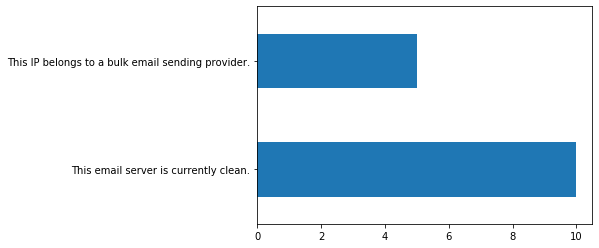

In [9]:
import matplotlib.pyplot as plt
import numpy as np
        
print ("\tBelow is the frequency bar chart of the emails that have been received from individual emails" + '\n')
dF['SPAM_STATUS_FROM_\'matrix.spfbl.net\''].value_counts().plot(kind='barh')


	Below is the frequency histogram of the emails that have been received from IP addresses



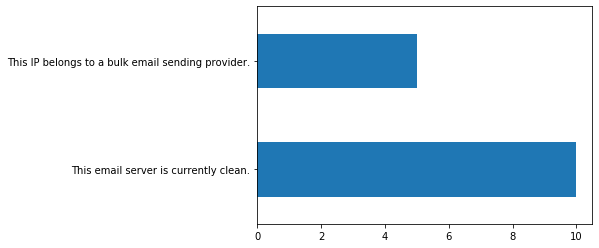

In [10]:
print ("\tBelow is the frequency histogram of the emails that have been received from IP addresses" + '\n')
dF['SPAM_STATUS_FROM_\'matrix.spfbl.net\''].value_counts().plot(kind='barh')

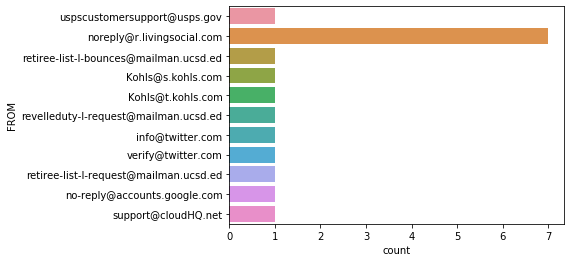

In [11]:
import seaborn as sns
p = sns.countplot(data=dF, y = 'FROM')

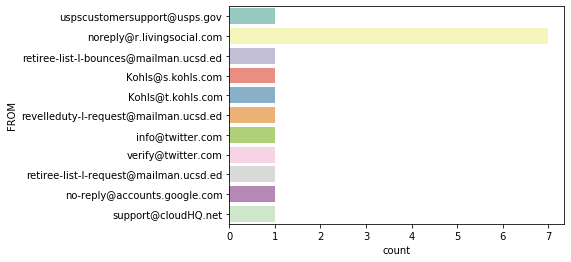

In [12]:
p = sns.countplot(data=dF, y = 'FROM', palette ='Set3')

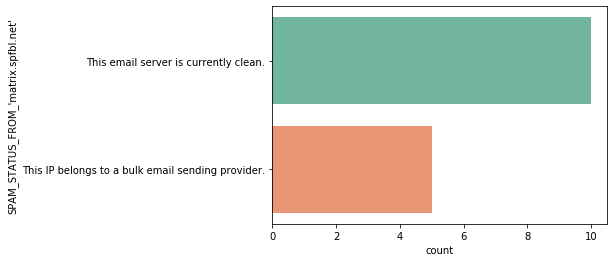

In [13]:
p = sns.countplot(data=dF, y = 'SPAM_STATUS_FROM_\'matrix.spfbl.net\'', palette ='Set2')

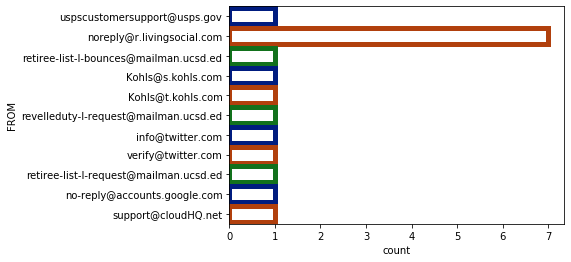

In [14]:
p = sns.countplot(data=dF, y = 'FROM', palette ='gray', facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

In [ ]:
# geo lookup against IP addresses
# ip's that are outside the normal domain
# new domain
# mutiple domains sending same/similiar subjects 
    #headers are same, but multiple subjects
# same ISP, sending a bunch of emails
# username spoofing
# domain spoofing
# screen record
    # blockwise explanation of code
    # output explain
    # automation in the future
    # saving graphs and document which is timestamped
    # 